In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(20, 20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving House_price.csv to House_price.csv


In [ ]:
data=pd.read_csv("House_price.csv",delimiter=",")
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
data.shape

(4600, 18)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


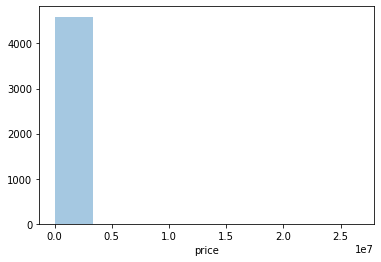

In [ ]:
sns.distplot(data['price'], kde=False, bins=8)

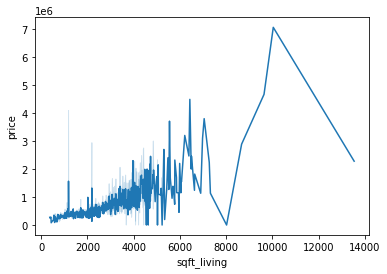

In [ ]:
sns.lineplot(x="sqft_living", y="price", data=data)

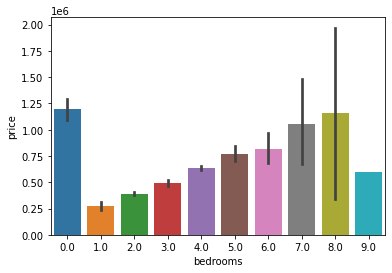

In [ ]:
sns.barplot(x='bedrooms', y='price', data=data)

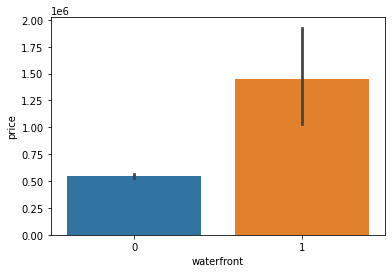

In [ ]:
sns.barplot(x='waterfront', y='price', data=data)

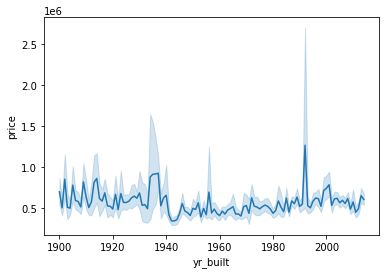

In [ ]:
sns.lineplot(x="yr_built", y="price", data=data)

In [ ]:
dataset_features = data.drop(['price', 'street', 'city', 'statezip', 'country', 'date'], axis=1)
dataset_labels = data['price']

In [ ]:
from sklearn.model_selection import train_test_split
train_features,test_features,train_labels,test_labels= train_test_split(dataset_features,dataset_labels,test_size=0.2, random_state=21)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_features, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predicted_price = regressor.predict(test_features)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error( test_labels, predicted_price)) 
print('Mean Squared Error:', metrics.mean_squared_error(test_labels,predicted_price)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predicted_price)))

Mean Absolute Error: 204905.41642286908
Mean Squared Error: 988922135500.283
Root Mean Squared Error: 994445.6423054419


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FuelConsumption.csv to FuelConsumption.csv


In [ ]:
data2=pd.read_csv("FuelConsumption.csv",delimiter=",")
data2.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [ ]:
data2.shape

(1067, 13)

In [ ]:
data2.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


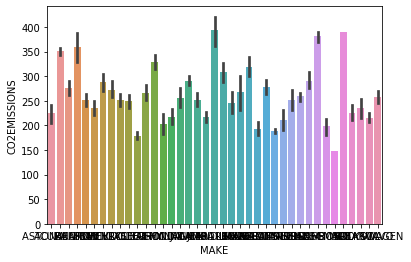

In [ ]:
sns.barplot(x='MAKE', y='CO2EMISSIONS', data=data2)

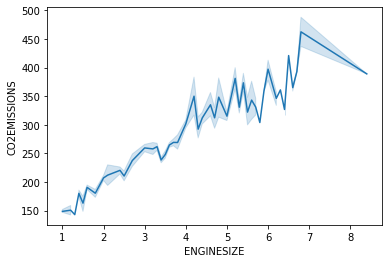

In [ ]:
sns.lineplot(x="ENGINESIZE", y="CO2EMISSIONS", data=data2)

In [ ]:
X = data2[[ 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
       'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']]
y = data2['CO2EMISSIONS']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
FUELCONSUMPTION_CITY,-10.559268
FUELCONSUMPTION_HWY,-14.800008
FUELCONSUMPTION_COMB,30.751472
FUELCONSUMPTION_COMB_MPG,-4.831250


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
766,356,316.517103
204,209,219.408573
629,230,237.275299
897,212,218.891866
711,168,167.452247
...,...,...
822,198,203.873677
1029,221,229.863097
798,191,197.424768
803,184,189.919932


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 15.508438577001867
Mean Squared Error: 589.0368745524468
Root Mean Squared Error: 24.27008188186531
